<a href="https://colab.research.google.com/github/alizmarossy/FAKT_ML/blob/main/harmadik_miniprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Időjárás előrejelzés készítése

##Packagek importálása

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.metrics import MeanSquaredError
import tensorflow


##Adattábla betöltése
  

Londoni időjárási adatok használata, forrás:https://www.worldweatheronline.com/hwd/default.aspx

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/My Drive/yearly_monthly_averages.csv')
df_m = pd.read_csv('/content/drive/My Drive/monthly_averages.csv')
df_1 = pd.read_csv('/content/drive/My Drive/weather_data_1hr.csv')
df_24 = pd.read_csv('/content/drive/My Drive/weather_data_24hr.csv')

##Ismerkedés az adatokkal

In [8]:
df.head().T

,0,1,2,3,4
loc_id,1.00,1.00,1.00,1.00,1.00
year,2009.00,2009.00,2009.00,2009.00,2009.00
month,1.00,2.00,3.00,4.00,5.00
maxtempC,5.00,6.00,11.00,15.00,17.00
maxtempF,41.00,44.00,52.00,59.00,63.00
mintempC,0.00,2.00,3.00,5.00,8.00
mintempF,32.00,35.00,37.00,42.00,46.00
avgtempC,2.00,4.00,6.00,10.00,13.00
avgtempF,36.00,39.00,44.00,50.00,55.00
rainMM,20.82,31.20,17.17,32.18,19.36


In [9]:
df_1.head(1).T

,0
loc_id,1
date,2019-06-01
time,0
isdaytime,no
tempC,16
tempF,61
windspeedMiles,6
windspeedKmph,10
winddirdegree,228
winddir16point,SW


In [6]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.shape
#kicsit kicsi, de nem volt nagyobb

(132, 29)

In [40]:
print(df.shape)
print(df_m.shape) # ez olyan kicsi, inkább hagyjuk
print(df_1.shape)
print(df_24.shape)

(132, 21)
(12, 35)
(1464, 19)
(61, 25)


In [15]:
df.dtypes
#nem kell semmit átalakítani

loc_id                 int64
year                   int64
month                  int64
maxtempC               int64
maxtempF               int64
mintempC               int64
mintempF               int64
avgtempC               int64
avgtempF               int64
rainMM               float64
rainInches           float64
rain_days              int64
snow_cm              float64
snow_days              int64
maxwindspeedMiles    float64
maxwindspeedKmph     float64
avgwindspeedMiles    float64
avgwindspeedKmph     float64
avgwindgustMiles     float64
avgwindgustKmph      float64
visibilityKm           int64
visibilityMiles        int64
humidity               int64
pressureMB           float64
pressureInches       float64
cloudcover             int64
sun_hour             float64
sun_days               int64
uvindex                int64
dtype: object

In [16]:
df_1.dtypes
#itt majd kell átalakítani

loc_id               int64
date                object
time                 int64
isdaytime           object
tempC                int64
tempF                int64
windspeedMiles       int64
windspeedKmph        int64
winddirdegree        int64
winddir16point      object
weatherCode          int64
weatherIconUrl      object
weatherDesc         object
precipMM           float64
precipInches       float64
humidity             int64
visibilityKm         int64
visibilityMiles      int64
pressureMB           int64
pressureInches       int64
cloudcover           int64
HeatIndexC           int64
HeatIndexF           int64
DewPointC            int64
DewPointF            int64
WindChillC           int64
WindChillF           int64
WindGustMiles        int64
WindGustKmph         int64
FeelsLikeC           int64
FeelsLikeF           int64
dtype: object

In [17]:
df.isna().sum()
#nincs NA, ez szuper

loc_id               0
year                 0
month                0
maxtempC             0
maxtempF             0
mintempC             0
mintempF             0
avgtempC             0
avgtempF             0
rainMM               0
rainInches           0
rain_days            0
snow_cm              0
snow_days            0
maxwindspeedMiles    0
maxwindspeedKmph     0
avgwindspeedMiles    0
avgwindspeedKmph     0
avgwindgustMiles     0
avgwindgustKmph      0
visibilityKm         0
visibilityMiles      0
humidity             0
pressureMB           0
pressureInches       0
cloudcover           0
sun_hour             0
sun_days             0
uvindex              0
dtype: int64

In [18]:
df_1.isna().sum()

loc_id             0
date               0
time               0
isdaytime          0
tempC              0
tempF              0
windspeedMiles     0
windspeedKmph      0
winddirdegree      0
winddir16point     0
weatherCode        0
weatherIconUrl     0
weatherDesc        0
precipMM           0
precipInches       0
humidity           0
visibilityKm       0
visibilityMiles    0
pressureMB         0
pressureInches     0
cloudcover         0
HeatIndexC         0
HeatIndexF         0
DewPointC          0
DewPointF          0
WindChillC         0
WindChillF         0
WindGustMiles      0
WindGustKmph       0
FeelsLikeC         0
FeelsLikeF         0
dtype: int64

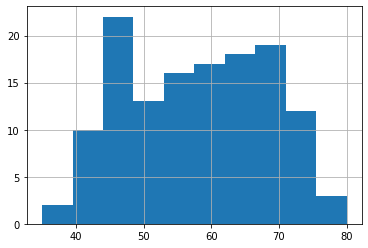

In [19]:
df.maxtempF.hist()

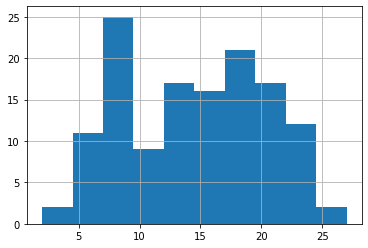

In [20]:
df.maxtempC.hist()
#érdekes, hogy máshogy néz ki a kettő

###Adatok tisztítása

In [21]:
df.head(1).T

,0
loc_id,1.00
year,2009.00
month,1.00
maxtempC,5.00
maxtempF,41.00
mintempC,0.00
mintempF,32.00
avgtempC,2.00
avgtempF,36.00
rainMM,20.82


In [22]:
df = df.drop(columns = ['maxtempF', 'mintempF', 'avgtempF', 'rainInches','maxwindspeedMiles',  'avgwindspeedMiles','visibilityMiles', 'pressureInches' ])

In [23]:
df.head(1).T

,0
loc_id,1.00
year,2009.00
month,1.00
maxtempC,5.00
mintempC,0.00
avgtempC,2.00
rainMM,20.82
rain_days,8.00
snow_cm,0.20
snow_days,2.00


In [25]:
df_1.head(1).T

,0
loc_id,1
date,2019-06-01
time,0
isdaytime,no
tempC,16
tempF,61
windspeedMiles,6
windspeedKmph,10
winddirdegree,228
winddir16point,SW


In [27]:
df0 = df_1.drop(columns = ['tempF', 'windspeedMiles','winddir16point', 'weatherIconUrl', 'precipInches', 'visibilityMiles', 'pressureInches', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles',  'FeelsLikeF'])

In [29]:
df0.head(1).T

,0
loc_id,1
date,2019-06-01
time,0
isdaytime,no
tempC,16
windspeedKmph,10
winddirdegree,228
weatherCode,116
weatherDesc,Partly cloudy
precipMM,0.0


In [30]:
df_1 = df0

In [32]:
df_24.head(1).T
#igazán lehetnének ugyanazok a változók benne

,0
loc_id,1
date,2019-06-01
maxtempC,26
maxtempF,78
mintempC,15
mintempF,58
avgtempC,22
avgtempF,72
totalprecipMM,0.0
totalprecipIn,0.0


In [37]:
df0 = df_24.drop(columns = ['maxtempF', 'mintempF', 'avgtempF','windspeedMiles', 'totalprecipIn', 'weatherIconUrl','visibilityMiles', 'pressureInches', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF' ])

In [38]:
df0.head().T

,0,1,2,3,4
loc_id,1,1,1,1,1
date,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05
maxtempC,26,24,20,17,19
mintempC,15,17,14,14,13
avgtempC,22,22,18,16,17
totalprecipMM,0.0,0.5,0.5,10.7,0.1
windspeedKmph,10,19,17,12,13
sunhour,8.7,3.3,5.1,5.1,6.9
winddirdegree,200,215,235,164,236
winddir16point,SSW,SW,SW,SSE,SW


In [39]:
df_24 = df0

###Adatok normalizálása, átalakítása

In [41]:
df_1.dtypes

loc_id             int64
date              object
time               int64
isdaytime         object
tempC              int64
windspeedKmph      int64
winddirdegree      int64
weatherCode        int64
weatherDesc       object
precipMM         float64
humidity           int64
visibilityKm       int64
pressureMB         int64
cloudcover         int64
HeatIndexC         int64
DewPointC          int64
WindChillC         int64
WindGustKmph       int64
FeelsLikeC         int64
dtype: object

In [44]:
laberer=LabelEncoder()
df_1.date=laberer.fit_transform(df_1.date)
df_1.isdaytime=laberer.fit_transform(df_1.isdaytime)
df_1.weatherDesc=laberer.fit_transform(df_1.weatherDesc)

In [45]:
df_1.dtypes
#tényleg működött az átalakítás, remélem, értelmes is maradt

loc_id             int64
date               int64
time               int64
isdaytime          int64
tempC              int64
windspeedKmph      int64
winddirdegree      int64
weatherCode        int64
weatherDesc        int64
precipMM         float64
humidity           int64
visibilityKm       int64
pressureMB         int64
cloudcover         int64
HeatIndexC         int64
DewPointC          int64
WindChillC         int64
WindGustKmph       int64
FeelsLikeC         int64
dtype: object

In [46]:
df_24.dtypes

loc_id              int64
date               object
maxtempC            int64
mintempC            int64
avgtempC            int64
totalprecipMM     float64
windspeedKmph       int64
sunhour           float64
winddirdegree       int64
winddir16point     object
weatherCode         int64
weatherDesc        object
humidity            int64
visibilityKm        int64
pressureMB          int64
cloudcover          int64
HeatIndexC          int64
DewPointC           int64
WindChillC          int64
WindGustKmph        int64
FeelsLikeC          int64
sunrise            object
sunset             object
moonrise           object
moonset            object
dtype: object

In [47]:
df_24.date=laberer.fit_transform(df_24.date)
df_24.winddir16point=laberer.fit_transform(df_24.winddir16point)
df_24.weatherDesc=laberer.fit_transform(df_24.weatherDesc)
df_24.sunrise=laberer.fit_transform(df_24.sunrise)
df_24.sunset=laberer.fit_transform(df_24.sunset)
df_24.moonrise=laberer.fit_transform(df_24.moonrise)
df_24.moonset=laberer.fit_transform(df_24.moonset)

In [48]:
df_24.dtypes
#ez szuper

loc_id              int64
date                int64
maxtempC            int64
mintempC            int64
avgtempC            int64
totalprecipMM     float64
windspeedKmph       int64
sunhour           float64
winddirdegree       int64
winddir16point      int64
weatherCode         int64
weatherDesc         int64
humidity            int64
visibilityKm        int64
pressureMB          int64
cloudcover          int64
HeatIndexC          int64
DewPointC           int64
WindChillC          int64
WindGustKmph        int64
FeelsLikeC          int64
sunrise             int64
sunset              int64
moonrise            int64
moonset             int64
dtype: object

In [51]:
df_24.moonrise.corr(df_24.sunset)
#megkérdőjelezhető, hogy kell-e ez a sok sunrise sunset stb, de érdekes, hogy nem korrelálnak, vagy valamit elrontottam

-0.02144910199398776

In [53]:
df_24.head(1)

,loc_id,date,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,...,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,sunrise,sunset,moonrise,moonset
0,1,0,26,15,22,0.0,10,8.7,200,11,...,7,21,12,21,12,21,6,13,11,23


###Adatok normalizálása

Train és teszt adatbázis létrehozása

In [54]:
df_1.head()

,loc_id,date,time,isdaytime,tempC,windspeedKmph,winddirdegree,weatherCode,weatherDesc,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,1,0,0,0,16,10,228,116,11,0.0,77,10,1023,7,16,12,16,12,16
1,1,0,100,0,16,9,230,116,11,0.0,78,10,1023,6,16,12,16,11,16
2,1,0,200,0,15,9,233,116,11,0.0,79,10,1022,5,15,11,15,10,15
3,1,0,300,0,15,8,235,116,11,0.0,79,10,1022,4,15,11,14,9,14
4,1,0,400,0,15,7,229,116,11,0.0,77,10,1022,4,15,11,15,8,15


In [55]:
df_1y = df_1['tempC'].copy()
print(df_1y)
print(df_1y.shape)
df_1y = df_1y.drop(df_1y.index[range(1)])
print(df_1y)
print(df_1y.shape)

0       16
1       16
2       15
3       15
4       15
        ..
1459    20
1460    20
1461    19
1462    18
1463    18
Name: tempC, Length: 1464, dtype: int64
(1464,)
1       16
2       15
3       15
4       15
5       16
        ..
1459    20
1460    20
1461    19
1462    18
1463    18
Name: tempC, Length: 1463, dtype: int64
(1463,)


In [57]:
df_1x = df_1.copy().drop('tempC', axis=1)
print(df_1x)
print(df_1x.shape)
df_1x = df_1x.drop(axis=0,index=(df_1x.shape[0]-1))
print(df_1y)
print(df_1y.shape)

#most annyira nem értem, mit csináltam, de credits to Andris

      loc_id  date  time  isdaytime  windspeedKmph  winddirdegree  \
0          1     0     0          0             10            228   
1          1     0   100          0              9            230   
2          1     0   200          0              9            233   
3          1     0   300          0              8            235   
4          1     0   400          0              7            229   
...      ...   ...   ...        ...            ...            ...   
1459       1    60  1900          0             18            260   
1460       1    60  2000          0             17            258   
1461       1    60  2100          0             15            257   
1462       1    60  2200          0             15            258   
1463       1    60  2300          0             14            259   

      weatherCode  weatherDesc  precipMM  humidity  visibilityKm  pressureMB  \
0             116           11       0.0        77            10        1023   
1          

In [58]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_1x,df_1y,test_size=0.1,shuffle=True)

In [61]:
normalizer = StandardScaler()
normalizer.fit(x1_train)
x1_train = normalizer.transform(x1_train)
x1_test = normalizer.transform(x1_test)

In [64]:
input = Input(shape=(x1_train.shape[1]))
x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

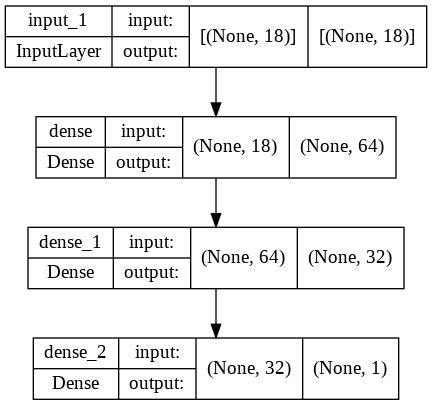

In [65]:
model = keras.Model(input, output)
plot_model(model, show_shapes=True)

In [66]:
model.compile(optimizer='adam',
    loss='MSE')

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
model.fit(x=x1_train, y=y1_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

In [69]:
model.evaluate(x1_test, y1_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5629


0.5629360675811768

###Ugyanez hónapokra

In [79]:
df.head()

,loc_id,year,month,maxtempC,mintempC,avgtempC,rainMM,rain_days,snow_cm,snow_days,...,avgwindspeedKmph,avgwindgustMiles,avgwindgustKmph,visibilityKm,humidity,pressureMB,cloudcover,sun_hour,sun_days,uvindex
0,1,2009,1,5,0,2,20.82,8,0.2,2,...,16.3,17.1,27.6,8,88,1011.1,50,150.0,20,2
1,1,2009,2,6,2,4,31.20,12,3.2,5,...,13.3,13.3,21.5,7,91,1015.1,67,85.5,14,3
2,1,2009,3,11,3,6,17.17,8,0.1,1,...,14.4,14.1,22.7,8,83,1015.0,51,190.0,21,2
3,1,2009,4,15,5,10,32.18,12,0.0,0,...,10.7,9.9,16.0,8,81,1013.3,46,249.0,16,3
4,1,2009,5,17,8,13,19.36,10,0.0,0,...,14.3,12.6,20.3,9,76,1018.1,48,246.0,20,5


In [ ]:
df_1y = df['avgtempC'].copy()
print(df_1y)
print(df_1y.shape)
df_1y = df_1y.drop(df_1y.index[range(1)])
print(df_1y)
print(df_1y.shape)


In [ ]:
df_1x = df.copy().drop('avgtempC', axis=1)
print(df_1x)
print(df_1x.shape)
df_1x = df_1x.drop(axis=0,index=(df_1x.shape[0]-1))
print(df_1y)
print(df_1y.shape)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_1x,df_1y,test_size=0.1,shuffle=True)
normalizer = StandardScaler()
normalizer.fit(x1_train)
x1_train = normalizer.transform(x1_train)
x1_test = normalizer.transform(x1_test)

input = Input(shape=(x1_train.shape[1]))
x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

model = keras.Model(input, output)
model.compile(optimizer='adam',
    loss='MSE')

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(x=x1_train, y=y1_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

model.evaluate(x1_test, y1_test)

In [84]:
model.evaluate(x1_test, y1_test)
#itt már nagyobb a loss

1/1 [==============================] - 0s 43ms/step - loss: 4.9225


4.922504901885986

##Nézzük meg a 24 óráson is

In [85]:
df_24.head()

,loc_id,date,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,...,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,sunrise,sunset,moonrise,moonset
0,1,0,26,15,22,0.0,10,8.7,200,11,...,7,21,12,21,12,21,6,13,11,23
1,1,1,24,17,22,0.5,19,3.3,215,12,...,61,21,13,20,23,20,6,14,13,29
2,1,2,20,14,18,0.5,17,5.1,235,12,...,42,17,8,16,20,16,5,15,16,35
3,1,3,17,14,16,10.7,12,5.1,164,10,...,54,16,10,16,14,16,4,16,18,39
4,1,4,19,13,17,0.1,13,6.9,236,12,...,65,16,9,15,17,15,4,17,22,43


In [ ]:
df_1y = df_24['avgtempC'].copy()
print(df_1y)
print(df_1y.shape)
df_1y = df_1y.drop(df_1y.index[range(1)])
print(df_1y)
print(df_1y.shape)

df_1x = df_24.copy().drop('avgtempC', axis=1)
print(df_1x)
print(df_1x.shape)
df_1x = df_1x.drop(axis=0,index=(df_1x.shape[0]-1))
print(df_1y)
print(df_1y.shape)


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_1x,df_1y,test_size=0.1,shuffle=True)
normalizer = StandardScaler()
normalizer.fit(x1_train)
x1_train = normalizer.transform(x1_train)
x1_test = normalizer.transform(x1_test)

input = Input(shape=(x1_train.shape[1]))
x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

model = keras.Model(input, output)
model.compile(optimizer='adam',
    loss='MSE')

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(x=x1_train, y=y1_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )


In [88]:
model.evaluate(x1_test, y1_test)
#még nagyobb a loss, bár az adatbázis is kisebb

1/1 [==============================] - 0s 40ms/step - loss: 19.8321


19.83207130432129

###Próbáljunk meg egy kicsit alakítani a modellen

In [ ]:
df_1y = df_1['tempC'].copy()
print(df_1y)
print(df_1y.shape)
df_1y = df_1y.drop(df_1y.index[range(1)])
print(df_1y)
print(df_1y.shape)

df_1x = df_1.copy().drop('tempC', axis=1)
print(df_1x)
print(df_1x.shape)
df_1x = df_1x.drop(axis=0,index=(df_1x.shape[0]-1))
print(df_1y)
print(df_1y.shape)

In [ ]:
#+ hidden layerek
x1_train, x1_test, y1_train, y1_test = train_test_split(df_1x,df_1y,test_size=0.1,shuffle=True)
normalizer = StandardScaler()
normalizer.fit(x1_train)
x1_train = normalizer.transform(x1_train)
x1_test = normalizer.transform(x1_test)

input = Input(shape=(x1_train.shape[1]))
x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

model = keras.Model(input, output)
model.compile(optimizer='adam',
    loss='MSE')

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(x=x1_train, y=y1_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

In [95]:
model.evaluate(x1_test, y1_test)
#nagyobb lett a loss, mint eddig

5/5 [==============================] - 0s 5ms/step - loss: 0.6833


0.683286726474762

In [96]:
df_1y = df_1['tempC'].copy()
print(df_1y)
print(df_1y.shape)
df_1y = df_1y.drop(df_1y.index[range(1)])
print(df_1y)
print(df_1y.shape)

df_1x = df_1.copy().drop('tempC', axis=1)
df_1x = df_1x.drop(axis=0,index=(df_1x.shape[0]-1))


x1_train, x1_test, y1_train, y1_test = train_test_split(df_1x,df_1y,test_size=0.1,shuffle=True)
normalizer = StandardScaler()
normalizer.fit(x1_train)
x1_train = normalizer.transform(x1_train)
x1_test = normalizer.transform(x1_test)

input = Input(shape=(x1_train.shape[1]))
x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

model = keras.Model(input, output)
model.compile(optimizer='adam',
    loss='MSE')

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(x=x1_train, y=y1_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

0       16
1       16
2       15
3       15
4       15
        ..
1459    20
1460    20
1461    19
1462    18
1463    18
Name: tempC, Length: 1464, dtype: int64
(1464,)
1       16
2       15
3       15
4       15
5       16
        ..
1459    20
1460    20
1461    19
1462    18
1463    18
Name: tempC, Length: 1463, dtype: int64
(1463,)
Epoch 1/500
37/37 [==============================] - 1s 7ms/step - loss: 321.8847 - val_loss: 225.1526
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 95.2950 - val_loss: 28.7638
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 18.9849 - val_loss: 13.7834
Epoch 4/500
37/37 [==============================] - 0s 4ms/step - loss: 11.1904 - val_loss: 9.9569
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 8.0631 - val_loss: 7.3686
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 6.2216 - val_loss: 5.9591
Epoch 7/500
37/37 [==============================] - 0s 3ms

In [97]:
model.evaluate(x1_test, y1_test)
#kisebb lett, mint legelőször

5/5 [==============================] - 0s 3ms/step - loss: 0.4649


0.464942991733551

#Fanni kódja

Ez a kód teljes mértékben Fannié, nekem csak megtetszett és kipróbáltam, tudok-e ilyet - ennek ellenére örülök, hogy lefutott.
A sajátomra alkalmazva nem, mert más volt a shape és nem tudom, azt hogyan kellene kezelni.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [71]:
hour = df_1

Epoch 1/500
19/19 [==============================] - 1s 15ms/step - loss: 161.5810 - MSE: 161.5810 - val_loss: 330.3630 - val_MSE: 330.3630
Epoch 2/500
19/19 [==============================] - 0s 6ms/step - loss: 29.1795 - MSE: 29.1795 - val_loss: 22.5336 - val_MSE: 22.5336
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 9.1893 - MSE: 9.1893 - val_loss: 14.5070 - val_MSE: 14.5070
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 5.1442 - MSE: 5.1442 - val_loss: 11.6739 - val_MSE: 11.6739
Epoch 5/500
19/19 [==============================] - 0s 5ms/step - loss: 4.2615 - MSE: 4.2615 - val_loss: 9.4716 - val_MSE: 9.4716
Epoch 6/500
19/19 [==============================] - 0s 5ms/step - loss: 3.4142 - MSE: 3.4142 - val_loss: 7.4022 - val_MSE: 7.4022
Epoch 7/500
19/19 [==============================] - 0s 6ms/step - loss: 2.9121 - MSE: 2.9121 - val_loss: 6.0507 - val_MSE: 6.0507
Epoch 8/500
19/19 [==============================] - 0s 4ms/step -

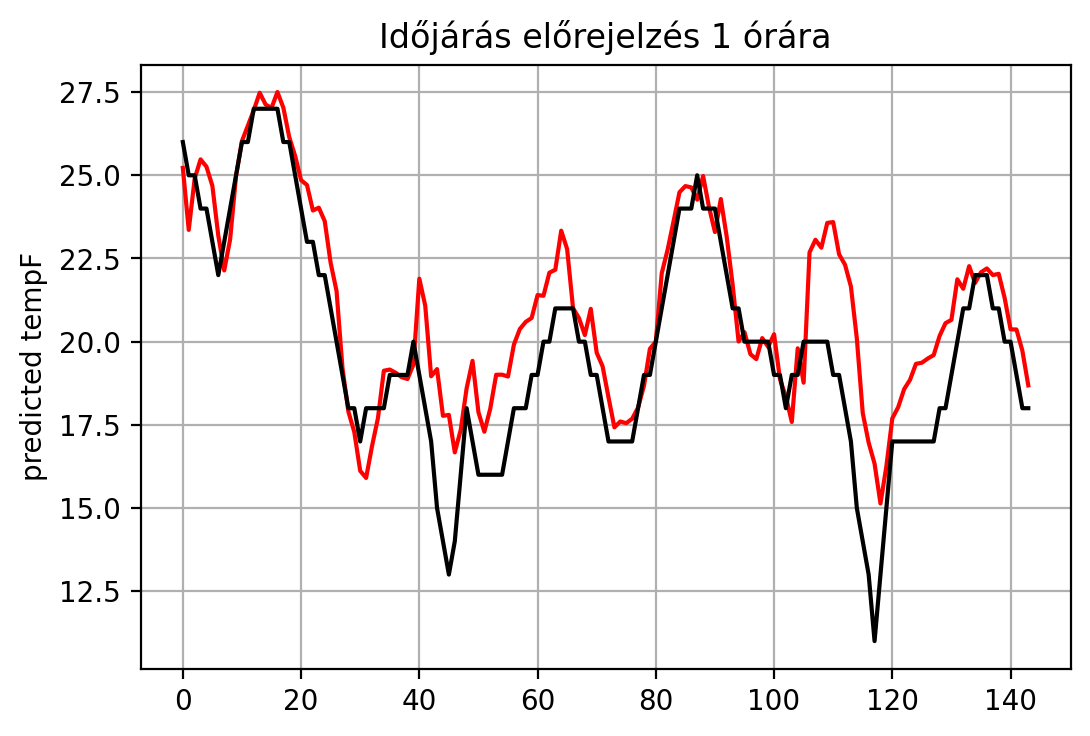

In [78]:
x_train_1 = hour.loc[0:(hour.shape[0] - 6*24 - 3),:].reset_index(drop = True)
x_train_2 = hour.loc[1:(hour.shape[0] - 6*24 - 2),:].reset_index(drop = True)
x_train = pd.concat([x_train_1, x_train_2], axis = 1)

y_train = hour.loc[2:(hour.shape[0] - 6*24 - 1), 'tempC']

x_test_1 = hour.loc[(hour.shape[0] - 2 - 6*24):hour.shape[0] - 3,:].reset_index(drop = True)
x_test_2 = hour.loc[(hour.shape[0] - 1 - 6*24):hour.shape[0] - 2,:].reset_index(drop = True)
x_test = pd.concat([x_test_1, x_test_2], axis = 1)

y_test = hour.loc[(hour.shape[0] - 6*24):hour.shape[0] - 1, 'tempC'].reset_index(drop = True)

normalizer = StandardScaler()
normalizer.fit(x_train)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

input = Input(shape=(x_train.shape[1]))
x = Dense(128, activation='relu')(input)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)
x = Dense(2, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = keras.Model(input, output)
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.025),
              loss = 'MSE',
              metrics = ['MSE'])
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)
model.fit(x_train, y_train, batch_size=64, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback])

print(model.evaluate(x_test, y_test))

x = np.linspace(start = 0, stop = 144, num = 144, endpoint = False)
y = model.predict(x_test)

fig, ax = plt.subplots()
fig.set_dpi(200)
ax.plot(x, y, 'r')
ax.plot(x, y_test, 'k')

ax.set(ylabel='predicted tempF', title='Időjárás előrejelzés 1 órára')
ax.grid()

plt.show()